In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

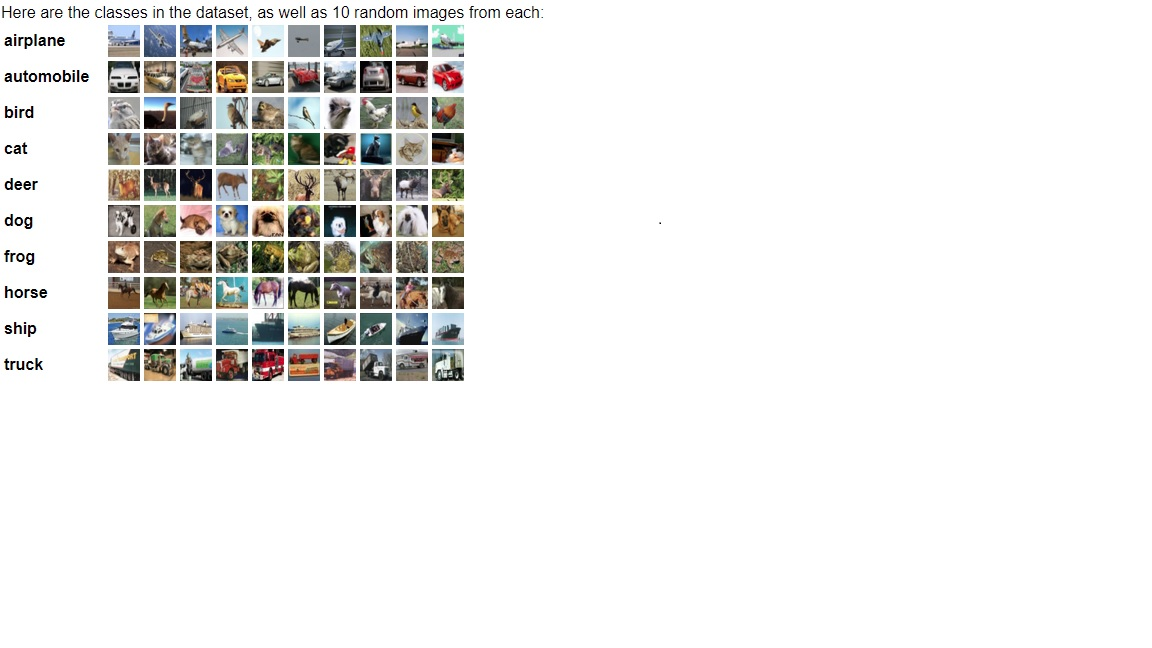

In [20]:
from IPython.display import Image
Image("cifar10.jpg")

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
# Single image

X_train[0].shape

(32, 32, 3)

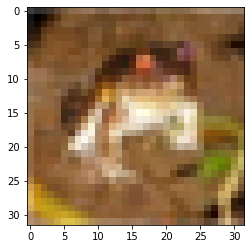

In [8]:
plt.imshow(X_train[0]); # Frog

In [9]:
X_train[0].max()

255

In [10]:
# Normalize
X_train = X_train/255
X_test = X_test/255

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_train 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
# Convert to categorical
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [15]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer="adam", metrics=["accuracy"])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [26]:
model.fit(X_train, y_cat_train, epochs=15,
         validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 24s 482us/sample - loss: 1.5018 - accuracy: 0.4580 - val_loss: 1.2572 - val_accuracy: 0.5544
Epoch 2/15
50000/50000 [==============================] - 22s 433us/sample - loss: 1.1640 - accuracy: 0.5897 - val_loss: 1.2111 - val_accuracy: 0.5685
Epoch 3/15
50000/50000 [==============================] - 20s 408us/sample - loss: 1.0178 - accuracy: 0.6448 - val_loss: 1.0315 - val_accuracy: 0.6441
Epoch 4/15
50000/50000 [==============================] - 22s 441us/sample - loss: 0.9035 - accuracy: 0.6840 - val_loss: 1.0508 - val_accuracy: 0.6421
Epoch 5/15
50000/50000 [==============================] - 20s 400us/sample - loss: 0.8198 - accuracy: 0.7139 - val_loss: 0.9747 - val_accuracy: 0.6720
Epoch 6/15
50000/50000 [==============================] - 19s 379us/sample - loss: 0.7422 - accuracy: 0.7408 - val_loss: 0.9304 - val_accuracy: 0.6898
Epoch 7/15
50000/50000 [====================

In [27]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

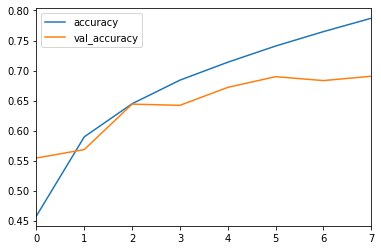

In [29]:
metrics[["accuracy", "val_accuracy"]].plot()

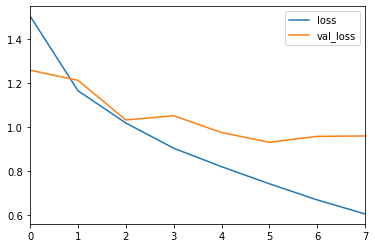

In [30]:
metrics[["loss", "val_loss"]].plot()

In [31]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.9590269516944885, 0.6905]

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
predictions = model.predict_classes(X_test)

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1000
           1       0.81      0.83      0.82      1000
           2       0.67      0.53      0.59      1000
           3       0.51      0.48      0.49      1000
           4       0.69      0.60      0.64      1000
           5       0.56      0.64      0.60      1000
           6       0.68      0.83      0.75      1000
           7       0.80      0.66      0.73      1000
           8       0.79      0.80      0.79      1000
           9       0.70      0.82      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



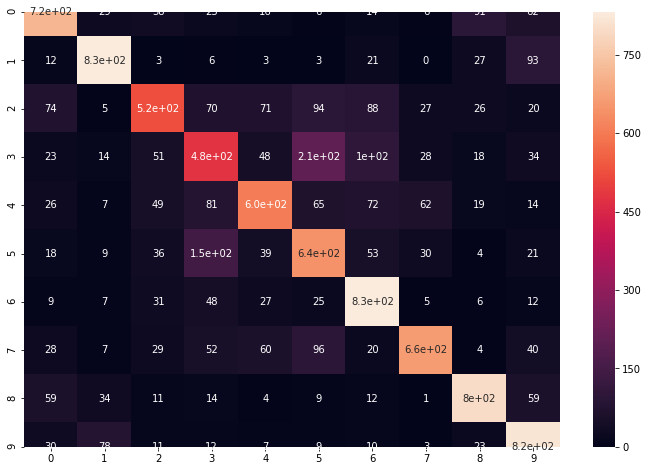

In [38]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

Knowing that a random guess is of about 10% probability, a 70% accuracy is not so bad. 32 by 32 images are pretty blurred so it's not easy.

In [39]:
my_image = X_test[0]

In [40]:
my_image

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

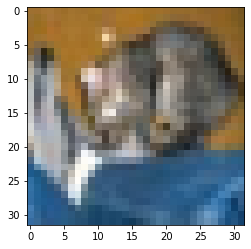

In [41]:
plt.imshow(my_image)

In [42]:
y_test[0]

array([3], dtype=uint8)

In [43]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([6], dtype=int64)

The model seems to confuse dogs and cats